#### Datos
Los datos del interferómetro vienen almacenados en un archivo de formato rad. Antes de abrir los datos en python, es importante notar que los números utilizan comas (,) en vez de puntos (.). Esto genera problemas en la lectura, por lo que se recomienda abrir el archivo con algun editor de texto y reemplazar las comas por puntos. La mayoría de los editores de texto poseen una funcion para esto (replace). Se recomienda el editor Sublime Text.

In [1]:
import numpy as np

In [3]:
ds = np.genfromtxt("interferometria.rad",comments="*") # set de datos leidos por numpy, extraidos desde 'interferometría.rad'

Ahora es importante extraer los datos. Según el enunciado, la organización de los mismos es como sigue. Los datos corresponden a una matriz de 18979 filas y 73 columnas. Cada fila es un dato. Cada columna almacena la siguiente información en el mismo orden:

| col 1  | col 2  |col 3  |col 4 | col 5  |     col 6    |    col 7     | col 8 |      col 9       |cols 10-73(64)|
|--------|--------|-------|------|--------|--------------|--------------|-------|------------------|--------------|
|Hora UTC| Azimut |Elevaci|  0   |   0    |Frec ini (MHz)|Tam C.E. (MHz)|   1   |$N^o$ Canales (64)| Canales  (T) |

De toda la información, nos interesa rescatar los canales (los cuales almacenan temperatura), la elevación y el azimut.

In [4]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
Channels = ds[:, 9:] # 18k mediciones, con 64 canales por medicion (matriz de 18k x 64)
Azimut = ds[:, 1] # azimut por medicion (vector de largo 18k)
Elevac = ds[:, 2] # elevacion por medicion (vector de largo 18k)

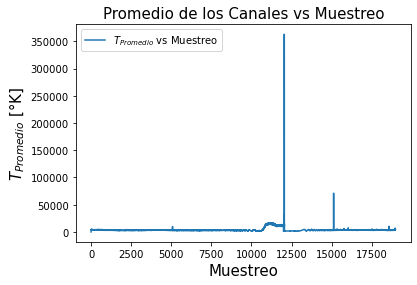

In [5]:
# Esta es la PARTE A)

import matplotlib.pyplot as plt
import numpy as np
# el elemento i-ésimo es Channels[i], que queremos promediarlo
# tal que
n = len(np.mean(Channels, axis = 1))
Y = np.zeros(n)
for i in range(1,n):
    media = np.mean(Channels[i])
    Y[i] += media

X = np.linspace(0,n-1,n)

#como esto nos da algo feo, le queremos quitar los puntos feos
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Y, label='$T_{Promedio}$ vs Muestreo')
plt.title('Promedio de los Canales vs Muestreo',fontsize = 15)
plt.ylabel('$T_{Promedio}$ [°K]',fontsize = 15)
plt.xlabel('Muestreo',fontsize = 15)
ax.legend()
plt.show()

#### Filtros

Una vez promediados los canales, es importante filtrar los datos, para evitar el tener outliers. El proceso de filtrado siempre es mas o menos sencillo cuando los datos no presentan demasiada dispersión, ya que se pueden usar argumentos estadísticos. Pero, ¿como proceder cuando los datos tienen alta variacion?. Por ejemplo, dados unos datos similares a la función sin(x), podemos tener un dato de valor 1 en donde los datos vecinos son cercanos a 0. Claramente es un outlier, sin embargo usando argumentos estadísticos llegariamos a la conclusión de que no, ya que 1 está dentro de los valores normales que se esperan para la función sin(x):

In [7]:
import matplotlib.pyplot as plt

En el ejemplo anterior podemos apreciar que es mas complicado aplicar un filtro. La clave está en observar en una localidad en torno a los puntos. La siguiente función lo que hace es revisar un conjunto local de puntos centrados en p_0. Si p_0 es máximo o mínimo dentro de este conjunto local, es reemplazado por el promedio entre los bordes del conjunto.

In [9]:
def local_norm(y, N):
    y2 = y
    for i in range(N, len(y) - N - 1):
        y_local = y2[i - N : i + N]
        if y2[i] >= max(y_local) or y2[i] <= min(y_local):
            y2[i] = 0.5*(y_local[0] + y_local[N - 1])
    return y2

Temp = local_norm(Y, 5)

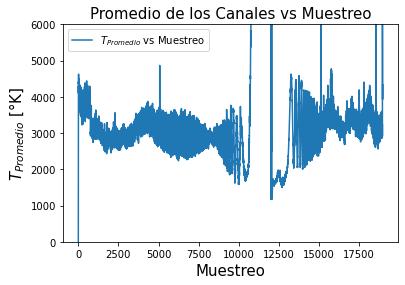

In [10]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(X, Temp, label='$T_{Promedio}$ vs Muestreo')
plt.title('Promedio de los Canales vs Muestreo',fontsize = 15)
plt.ylabel('$T_{Promedio}$ [°K]',fontsize = 15)
plt.xlabel('Muestreo',fontsize = 15)
plt.ylim(0,6000)
ax1.legend()
plt.show()



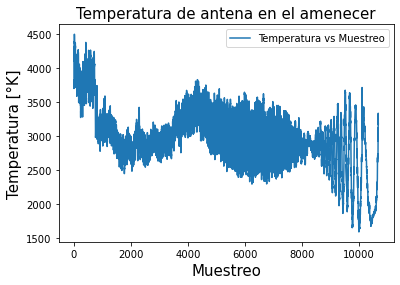

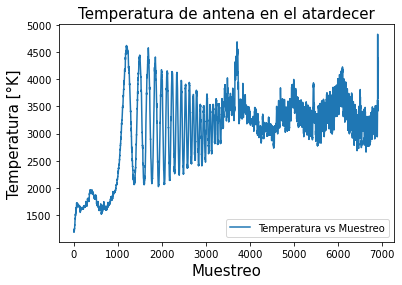

In [11]:
#Ahora hacemos la parte b)

#dividimos el arreglo con las temperaturas en 2, 
#lo cual podemos hacerlo con una máscara, o bien con un for, elegiremos una mascara
indices_amanecer = sorted(X[X<11000])
indices_atardecer = sorted(X[X>11000])


#primero debemos obtener el amanecer
Temp_aman = np.zeros(len(indices_amanecer))
for i in indices_amanecer:
    Temp_aman[int(i)] = Temp[int(i)]
    
    
#ahora el atardecer
Temp_atar = np.zeros(len(indices_atardecer))
for i in indices_atardecer:
    Temp_atar[int(i%11001)] = Temp[int(i)]



#comprobamos que sea el primer arreglo
N = 3

z = 10674
T_amanecer = local_norm(Temp_aman[1:z],N)
Muestreo_amanecer = indices_amanecer[1:z]
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.plot(Muestreo_amanecer, T_amanecer, label='Temperatura vs Muestreo')
plt.title('Temperatura de antena en el amenecer',fontsize = 15)
plt.ylabel('Temperatura [°K]',fontsize = 15)
plt.xlabel('Muestreo',fontsize = 15)
ax0.legend()
plt.show()

#comprobamos que sea el segundo arreglo
u = 1070
T_atardecer = local_norm(Temp_atar[u:], N)
f = len(indices_atardecer[u:])
Muestreo_atardecer = np.linspace(0,f-1,f)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(Muestreo_atardecer, T_atardecer, label='Temperatura vs Muestreo')
plt.title('Temperatura de antena en el atardecer',fontsize = 15)
plt.ylabel('Temperatura [°K]',fontsize = 15)
plt.xlabel('Muestreo',fontsize = 15)
ax2.legend()
plt.show()

#vemos que ambos gráficos salen bien, por tanto, logramos dividir en 2 arreglos 
#aquí es donde podemos volver a ambos "for" y elim

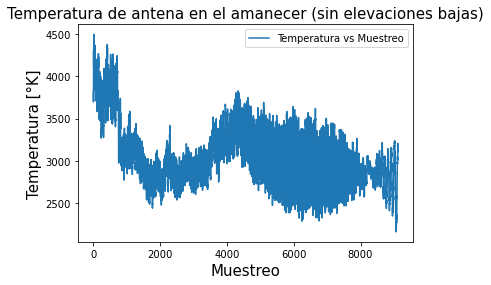

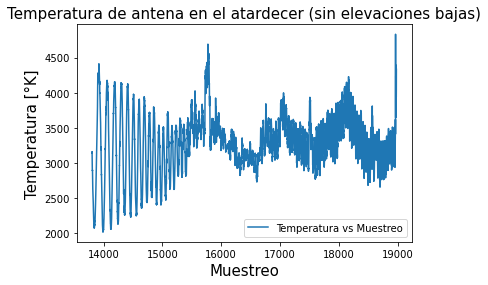

In [12]:
#Ahora la Parte D) 

#Ahora lo que nos interesa es remover los datos de ambas mediciones (amanecer y atardecer)
#que contienen elevaciones bajas (20 grados), para ello definimos nuevos arreglos:


#print(indices_amanecer)
indices_nuevos_aman = []
for i in range(1, len(indices_amanecer)):
    if Elevac[i]>23:
        indices_nuevos_aman += [i]
indices_nuevos_aman = np.array(indices_nuevos_aman)

T_aman_elevac_baj = []
for i in indices_nuevos_aman:
    T_aman_elevac_baj += [Temp[int(i)]]
T_aman_elevac_baj = np.array(T_aman_elevac_baj) 
    
    
#ahora para el atardecer
indices_nuevos_atar = []
for i in indices_atardecer:
    if Elevac[int(i)]>23:
        indices_nuevos_atar += [int(i)]
indices_nuevos_atar = np.array(indices_nuevos_atar)

T_atar_elevac_baj = []
for i in indices_nuevos_atar:
    T_atar_elevac_baj += [Temp[int(i)]]
T_atar_elevac_baj = np.array(T_atar_elevac_baj) 



#ahora graficamos
T_am = local_norm(T_aman_elevac_baj, 3)
T_at = local_norm(T_atar_elevac_baj, 3)
fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
ax6.plot(indices_nuevos_aman, T_am, label='Temperatura vs Muestreo')
plt.title('Temperatura de antena en el amanecer (sin elevaciones bajas)',fontsize = 15)
plt.ylabel('Temperatura [°K]',fontsize = 15)
plt.xlabel('Muestreo',fontsize = 15)
ax6.legend()
plt.show()

fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
ax7.plot(indices_nuevos_atar, T_at, label='Temperatura vs Muestreo')
plt.title('Temperatura de antena en el atardecer (sin elevaciones bajas)',fontsize = 15)
plt.ylabel('Temperatura [°K]',fontsize = 15)
plt.xlabel('Muestreo',fontsize = 15)
ax7.legend()
plt.show()


La rutina anterior es una rutina sencilla. Las señales son mas complejas, por lo que deben probar con algún método que de buenos resultados. Algo común es la utilización de filtros de mediana. En python está ya implementado el filtro de mediana. Pueden revisar la documentación de scipy.signal.medfilt, la cual es una función para aplicar un filtro de mediana. Deben a lo menos explicar como funciona.

#### Transformada de fourier

En lo que viene, mostramos como se puede realizar tanto una transformada como una antitransformada de fourier, para eliminar por ejemplo frecuencias superpuestas.

No handles with labels found to put in legend.


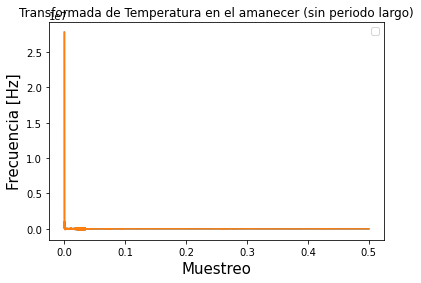

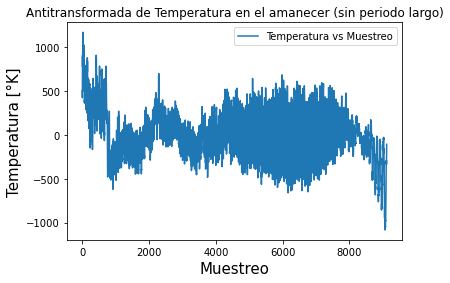

No handles with labels found to put in legend.


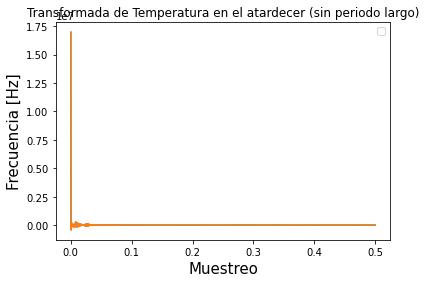

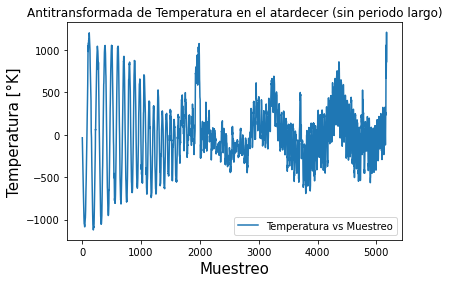

In [207]:
#Parte E)

g=4

# AMANECER
#Transformamos a espacio de fourier

w_am = np.fft.rfftfreq(len(T_am)) # vector de frecuencias
y_w_am = np.fft.rfft(T_am) # Vector de transformada de fourier


fig9 = plt.figure()
ax9 = fig9.add_subplot(111)
ax9.plot(w_am, y_w_am.real) 
ax9.plot(w_am[0:], y_w_am[0:].real) 
plt.title('Transformada de Temperatura en el amanecer (sin periodo largo)',fontsize = 12)
plt.ylabel('Frecuencia [Hz]',fontsize = 15)
plt.xlabel('Muestreo',fontsize = 15)
ax9.legend()
plt.show()

# Eliminamos las frecuencias altas

y_w2_am = y_w_am
for i in range(0,g):
    y_w2_am[i] = 0


# aplicamos anti transformada

y_t2_am = np.fft.ifft(y_w2_am)

muestreo_sin_p_largo_am = np.linspace(0, max(indices_nuevos_aman), len(y_t2_am))

fig8 = plt.figure()
ax8 = fig8.add_subplot(111)
ax8.plot(muestreo_sin_p_largo_am, y_t2_am.real, label='Temperatura vs Muestreo')
plt.title('Antitransformada de Temperatura en el amanecer (sin periodo largo)',fontsize = 12)
plt.ylabel('Temperatura [°K]',fontsize = 15)
plt.xlabel('Muestreo',fontsize = 15)
ax8.legend()
plt.show()


##############################################################################################



# ATARDECER
#Transformamos a espacio de fourier

w_at = np.fft.rfftfreq(len(T_at)) # vector de frecuencias
y_w_at = np.fft.rfft(T_at) # Vector de transformada de fourier


fig11 = plt.figure()
ax11 = fig11.add_subplot(111)
ax11.plot(w_at, y_w_at.real) 
ax11.plot(w_at[0:], y_w_at[0:].real) 
plt.title('Transformada de Temperatura en el atardecer (sin periodo largo)',fontsize = 12)
plt.ylabel('Frecuencia [Hz]',fontsize = 15)
plt.xlabel('Muestreo',fontsize = 15)
ax11.legend()
plt.show()

# Eliminamos las frecuencias altas

y_w2_at = y_w_at
for i in range(0,g):
    y_w2_at[i] = 0


# aplicamos anti transformada

y_t2_at = np.fft.ifft(y_w2_at)

muestreo_sin_p_largo_at = np.linspace(0, max(indices_nuevos_atar)-min(indices_nuevos_atar), len(y_t2_at))

fig12 = plt.figure()
ax12 = fig12.add_subplot(111)
ax12.plot(muestreo_sin_p_largo_at, y_t2_at.real, label='Temperatura vs Muestreo')
plt.title('Antitransformada de Temperatura en el atardecer (sin periodo largo)',fontsize = 12)
plt.ylabel('Temperatura [°K]',fontsize = 15)
plt.xlabel('Muestreo',fontsize = 15)
ax12.legend()
plt.show()


9113 5177


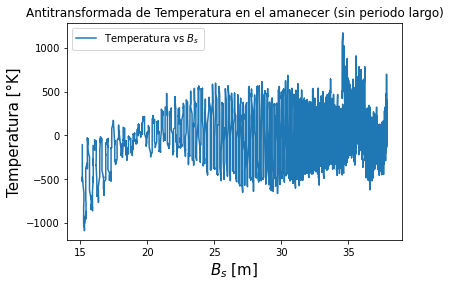

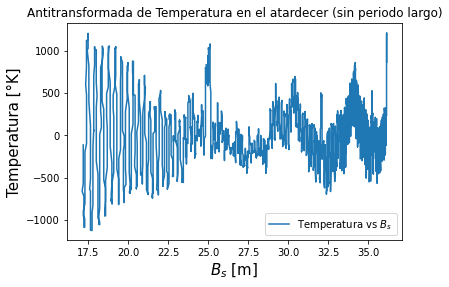

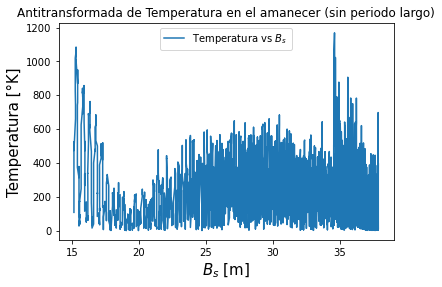

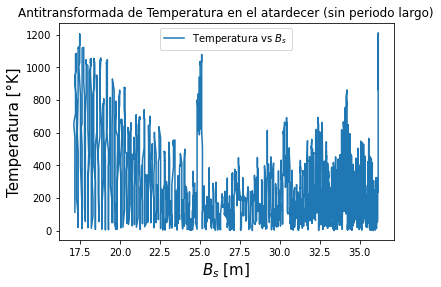

In [35]:
#Ahora la parte F)



print(len(indices_nuevos_aman), len(indices_nuevos_atar))

#Definimos la funcion B_s
d = 37.85#separacion de los telescopios en metros
alfa = 85.2

Azimut_aman = []
Elevac_aman = []
Azimut_atar = []
Elevac_atar = []
for i in indices_nuevos_atar:
    if i%2 !=0:
        Azimut_atar += [Azimut[int(i)]]
        Elevac_atar += [Elevac[int(i)]]
Azimut_atar = np.array(Azimut_atar)
Elevac_atar = np.array(Elevac_atar)
for i in indices_nuevos_aman:
    if i%2 !=0:
        Azimut_aman += [Azimut[int(i)]]
        Elevac_aman += [Elevac[int(i)]]
Azimut_aman = np.array(Azimut_aman)
Elevac_aman = np.array(Elevac_aman)

k = (np.pi/180)
B_s_aman = (d)*np.sqrt((1-(((np.cos((Azimut_aman-alfa)*k))*(np.cos((Elevac_aman)*k)))**2)))
B_s_atar = (d)*np.sqrt((1-(((np.cos((Azimut_atar-alfa)*k))*(np.cos((Elevac_atar)*k)))**2)))

#graficamos sin valor absoluto de ambos horarios
fig13 = plt.figure()
ax13 = fig13.add_subplot(111)
ax13.plot(B_s_aman, y_t2_am.real, label='Temperatura vs $B_{s}$ ')
plt.title('Antitransformada de Temperatura en el amanecer (sin periodo largo)',fontsize = 12)
plt.ylabel('Temperatura [°K]',fontsize = 15)
plt.xlabel('$B_{s}$ [m]',fontsize = 15)
ax13.legend()
plt.show()

fig15 = plt.figure()
ax15 = fig15.add_subplot(111)
ax15.plot(B_s_atar, y_t2_at[1:].real, label='Temperatura vs $B_{s}$ ')
plt.title('Antitransformada de Temperatura en el atardecer (sin periodo largo)',fontsize = 12)
plt.ylabel('Temperatura [°K]',fontsize = 15)
plt.xlabel('$B_{s}$ [m]',fontsize = 15)
ax15.legend()
plt.show()

#ahora el valor absoluto
fig14 = plt.figure()
ax14 = fig14.add_subplot(111)
ax14.plot(B_s_aman, abs(y_t2_am.real), label='Temperatura vs $B_{s}$ ')
plt.title('Antitransformada de Temperatura en el amanecer (sin periodo largo)',fontsize = 12)
plt.ylabel('Temperatura [°K]',fontsize = 15)
plt.xlabel('$B_{s}$ [m]',fontsize = 15)
ax14.legend()
plt.show()

fig16 = plt.figure()
ax16 = fig16.add_subplot(111)
ax16.plot(B_s_atar, abs(y_t2_at[1:].real), label='Temperatura vs $B_{s}$ ')
plt.title('Antitransformada de Temperatura en el atardecer (sin periodo largo)',fontsize = 12)
plt.ylabel('Temperatura [°K]',fontsize = 15)
plt.xlabel('$B_{s}$ [m]',fontsize = 15)
ax16.legend()
plt.show()

[5.95187892e-03 2.96048568e+07] [9.10861502e-03 2.90057478e+07]
podemos decir que el tamaño angular o diámetro angular del sol es aproximadamente para ambas observaciones 0.682 ° y  1.044 °


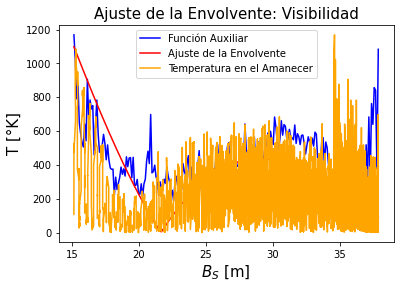

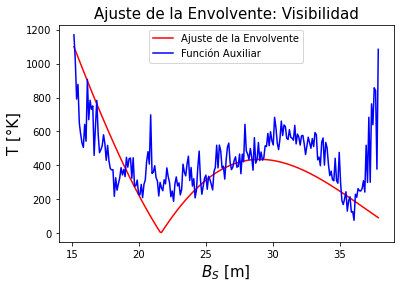

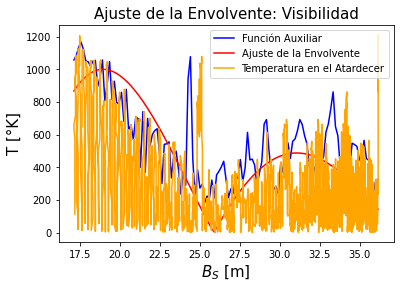

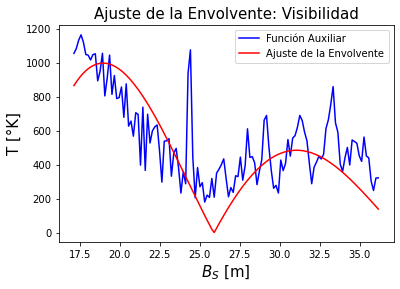

In [277]:
#                3)
#Aquí lo que vamos a hacer para calcular la función visibilidad es 
#ayudarnos de una curva que se aproxima a la envolvente, que toma localmente 
#todos los máximos de la función valor absoluto del espectro de temperatura
#para ambas observaciones, y luego trataremos de ajustar una curva con pará
#metros óptimos para esta misma, y evidentemente ajusta también a la función
#original! (nos costó mucho T.T)

#Nota: puede que nos hayamos confundido en nombrar al atardecer como amanecer
#y viceversa, pero los fines que buscamos se mantienen inalterables aún ese 
#error minúsculo.
from math import factorial
from scipy.optimize import curve_fit
from scipy.special import jn


Lambda = 0.2111 #Longitud de Onda en metros

def funcion_visibilidad(B_s, Radio, I_0):
    x = (2*np.pi*Radio*B_s)/Lambda
    return abs((Lambda*I_0*Radio/(B_s))*(jn(1, x)))

#queremos conseguir los puntos maximos locales de la funcion y_t2_am.real para
#poder conocer mas o menos cuanto tiene que valer nuestra función envolvente
#para ello tomaremos los máximos locales de cada N puntos, variando N para encontrar el óptimo
N = 20
envolvente_amanecer_obs = []
for i in range(0, int(len(y_t2_am.real[1:])/N)):
    envolvente_amanecer_obs += [max(abs(y_t2_am[N*i:N*(i+1)-1].real))]
envolvente_amanecer_obs = np.array(envolvente_amanecer_obs)
B_s_aman_obs = np.linspace(min(B_s_aman), max(B_s_aman), len(envolvente_amanecer_obs))


envolvente_atardecer_obs = []
for i in range(0, int(len(y_t2_at.real[1:])/N)):
    envolvente_atardecer_obs += [max(abs(y_t2_at[N*i:N*(i+1)-1].real))]
envolvente_atardecer_obs = np.array(envolvente_atardecer_obs)
B_s_atar_obs = np.linspace(min(B_s_atar), max(B_s_atar), len(envolvente_atardecer_obs))


guess1 = np.array([.9*10**(-4), 500])
parametros1, covarianza = curve_fit(funcion_visibilidad,  B_s_aman_obs, envolvente_amanecer_obs, guess1)

guess2 = np.array([0.9*10**(-4), 500])
parametros2, covarianza = curve_fit(funcion_visibilidad,  B_s_atar_obs, envolvente_atardecer_obs, guess2)

R_fit1 = parametros1[0]
I_fit1 = parametros1[1]
R_fit2 = parametros2[0]
I_fit2 = parametros2[1]

print(parametros1, parametros2)
#debemos pasar de radianes a grados
print("podemos decir que el tamaño angular o diámetro angular del sol es aproximadamente para ambas observaciones",
      round(2*(R_fit1)*(180/np.pi),3),"° y ",round(2*(R_fit2)*(180/np.pi),3), "°")
            
envolvente_amanecer = funcion_visibilidad(B_s_aman_obs, R_fit1, I_fit1)
envolvente_atardecer = funcion_visibilidad(B_s_atar_obs, R_fit2, I_fit2)

fig55 = plt.figure()
ax55 = fig55.add_subplot(111)
ax55.plot(B_s_aman_obs, envolvente_amanecer_obs ,"blue", label='Función Auxiliar')
ax55.plot(B_s_aman_obs, envolvente_amanecer,"red", label='Ajuste de la Envolvente')
ax55.plot(B_s_aman, abs(y_t2_am.real), "orange",label='Temperatura en el Amanecer')
plt.title('Ajuste de la Envolvente: Visibilidad',fontsize = 15)
plt.ylabel('T [°K]',fontsize = 15)
plt.xlabel('$B_{S}$ [m]',fontsize = 15)
ax55.legend()
plt.show()

fig53 = plt.figure()
ax53 = fig53.add_subplot(111)
ax53.plot(B_s_aman_obs, envolvente_amanecer,"red", label='Ajuste de la Envolvente')
ax53.plot(B_s_aman_obs, envolvente_amanecer_obs ,"blue", label='Función Auxiliar')
plt.title('Ajuste de la Envolvente: Visibilidad',fontsize = 15)
plt.ylabel('T [°K]',fontsize = 15)
plt.xlabel('$B_{S}$ [m]',fontsize = 15)
ax53.legend()
plt.show()

fig66 = plt.figure()
ax66 = fig66.add_subplot(111)
ax66.plot(B_s_atar_obs, envolvente_atardecer_obs ,"blue", label='Función Auxiliar')
ax66.plot(B_s_atar_obs, envolvente_atardecer,"red", label='Ajuste de la Envolvente')
ax66.plot(B_s_atar, abs(y_t2_at.real)[1:],"orange", label='Temperatura en el Atardecer')
plt.title('Ajuste de la Envolvente: Visibilidad',fontsize = 15)
plt.ylabel('T [°K]',fontsize = 15)
plt.xlabel('$B_{S}$ [m]',fontsize = 15)
ax66.legend()
plt.show()

fig63 = plt.figure()
ax63 = fig63.add_subplot(111)
ax63.plot(B_s_atar_obs, envolvente_atardecer_obs ,"blue", label='Función Auxiliar')
ax63.plot(B_s_atar_obs, envolvente_atardecer,"red", label='Ajuste de la Envolvente')

plt.title('Ajuste de la Envolvente: Visibilidad',fontsize = 15)
plt.ylabel('T [°K]',fontsize = 15)
plt.xlabel('$B_{S}$ [m]',fontsize = 15)
ax63.legend()
plt.show()
